In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import numpy as np 
import glob 
import warnings 
from scipy.stats import norm
from IPython.display import display, HTML
import scipy
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
sns.set()

In [2]:
leagues = ['EPL','La_Liga','Bundesliga','Serie_A','Ligue_1','RFPL']

In [3]:
driver = webdriver.Chrome(r"C:/chromedriver_win32/chromedriver.exe")

In [66]:
def getTeamStats(leagues):
    #Create the receiving dataFrame
    dfOut= []
    #Go through every league
    for league in leagues:
        #Establish Connection
        driver.get('https://understat.com/league/'+league)
        #Get the relevant object
        base = driver.find_element_by_id('league-chemp')
        #Get Rows
        rows = base.find_elements_by_tag_name('tr')
        #Create a list to receive values
        values=[]
        #Go through every row
        for item in range(1,len(rows)):
            #Get elements from the row
            row = rows[item].find_elements_by_tag_name('td')
            #Add those elements to the values list
            values.append([row[i].text for i in range(1,len(row))])
            #Go through every value and append it to the dataframe value by value
            for j in range(0,len(values)):
                dfOut.append([league,values[j][0],values[j][1],values[j][2],values[j][3],values[j][4],values[j][5],values[j][6],
                             values[j][7],values[j][8],values[j][9],values[j][10]])
    return dfOut

#Run the function
dfOut = getTeamStats(leagues=leagues)
#Convert to dataframe
dfOut = pd.DataFrame(dfOut,columns=['league','team','matches','wins','draws','losses','goals_for','goals_against','points','xG','xGA','xPTS'])
#Drop duplicate rows created
dfOut = dfOut.drop_duplicates()

In [68]:
teams = dfOut['team'].unique()

In [71]:


def getPlayerStats(teams):

    data = []
    driver = webdriver.Chrome(r"C:/chromedriver_win32/chromedriver.exe")

    for i in teams:
        driver.get('https://understat.com/team/'+i+'/2018')
        baseTable = driver.find_element_by_id('team-players')
        tableRows = baseTable.find_elements_by_tag_name('tr')
        for item in range(1,len(tableRows)):
            row     = tableRows[item].find_elements_by_tag_name('td')
            Team    = i
            name    = row[1].text
            pos     = row[2].text
            apps    = row[3].text
            Min     = row[4].text
            goals   = row[5].text
            assists = row[6].text
            sh90    = row[7].text
            kp90    = row[8].text
            xg      = row[9].text
            xa      = row[10].text
            xg90    = row[11].text
            xa90    = row[12].text
            
            data.append([Team,name,pos,apps,Min,goals,assists,sh90,kp90,xg,xa,xg90,xa90])

    df = pd.DataFrame(data)
    df = df.rename(columns={0:'Team',1:"Name",2: "Position",3: "Apps", 4:"Min", 5:"Goals_Scored"
                    , 6:"Assists",7: "Sh90",8: "KP90",9: "xG",10: "xA"
                    , 11:"xG90",12: "xA90"})
    return df

df = getPlayerStats(teams)

In [72]:
df['Goals_Scored'] = pd.to_numeric(df['Goals_Scored'])
df['Sh90'] = pd.to_numeric(df['Sh90'])
df['Apps'] = pd.to_numeric(df['Apps'])
df['KP90'] = pd.to_numeric(df['KP90'])
df['Assists'] = pd.to_numeric(df['Assists'])

In [73]:
len(df.loc[21]['Name'])
df_teams = df[df.Name =='']
df_players = df[df.Name != '']

In [74]:
top_teams =['Manchester City','Liverpool','Manchester United','Barcelona','Real Madrid','Paris Saint Germain','Juventus']
data = df_players[(df_players.Apps > 10) & (df_players['Position'].isin(['F', 'F M']) & (df_players['Team'].isin(top_teams)))]

In [75]:
data.head()

,Team,Name,Position,Apps,Min,Goals_Scored,Assists,Sh90,KP90,xG,xA,xG90,xA90
0,Manchester City,Sergio Agüero,F,25.00,1879,18,6,4.41,1.20,17.10-0.90,3.78-2.22,0.82,0.18
1,Manchester City,Raheem Sterling,F M,26.00,2093,12,8,2.24,2.24,11.25-0.75,9.12+1.12,0.48,0.39
2,Manchester City,Leroy Sané,F,24.00,1506,8,9,2.51,2.03,6.00-2.00,6.91-2.09,0.36,0.41
4,Manchester City,Riyad Mahrez,F M,23.00,1062,6,2,3.73,1.44,6.21+0.21,2.51+0.51,0.53,0.21
5,Manchester City,Gabriel Jesus,F,22.00,822,6,2,3.83,1.86,8.98+2.98,2.54+0.54,0.98,0.28


In [76]:
df_players['Position'].unique()

array(['F', 'F M', 'M', 'D', 'D M', 'GK', 'S', 'D F M', 'D F'],
      dtype=object)

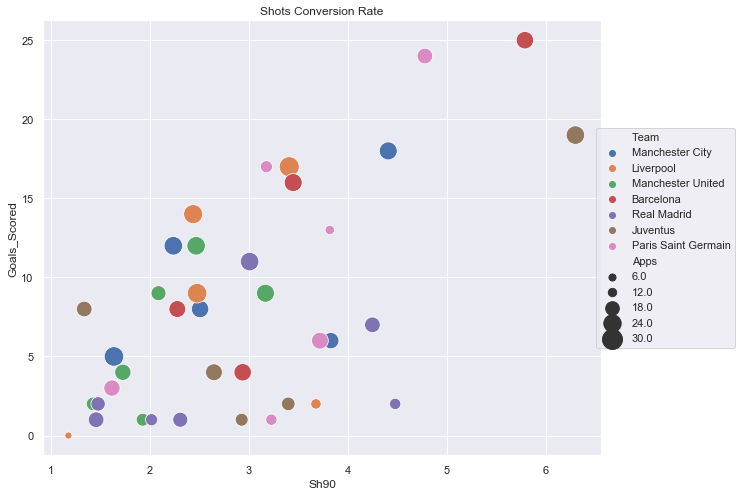

In [77]:
plt.figure(figsize=(10,8))
plt.title('Shots Conversion Rate')
plt.ylabel('Shots Per 90 Minutes')
plt.xlabel('Goals')
g = sns.scatterplot(data=data,x=data['Sh90'],y =data['Goals_Scored'],hue=data['Team'],size = data['Apps'],sizes=(50, 400))
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)